In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import imageio

import os
import seaborn as sns
from PIL import Image
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

from keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,MaxPool2D

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
# changing dir and loading images in the folder
os.chdir("C:\\Users\\CyberOps\\PhD\\balanceddata")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Get GPU name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c7b42a77-7f7e-1ee4-bab6-b0975b331a65)


In [ ]:
# Install tf-nightly (required until 2.13.0+ is the default in Google Colab)
!pip install -U -q tf-nightly

# Check TensorFlow version (should be minimum 2.4.0+ but 2.13.0+ is better)
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

# Add timestamp
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

In [4]:
onlyfiles = os.listdir()
len(onlyfiles)

11700

['29', '18', '12', '30', '10', '22', '30', '29', '7', '21', '20', '30', '26', '14', '18', '28', '11', '25', '26', '24', '8', '12', '5', '23', '26', '11', '27', '24', '27', '25', '15', '23', '29', '13', '26', '15', '20', '20', '29', '5', '13', '29', '21', '25', '17', '27', '13', '16', '20', '8', '29', '11', '23', '16', '10', '23', '5', '26', '30', '5', '18', '29', '5', '9', '26', '28', '16', '20', '16', '22', '17', '23', '9', '7', '23', '12', '30', '9', '27', '9', '29', '10', '21', '30', '6', '8', '17', '28', '16', '18', '26', '20', '21', '9', '26', '17', '21', '5', '27', '7', '10', '13', '23', '20', '23', '12', '28', '25', '5', '23', '28', '14', '16', '28', '9', '14', '5', '29', '12', '14', '27', '20', '10', '13', '29', '28', '24', '18', '25', '21', '15', '21', '6', '16', '14', '12', '7', '19', '10', '8', '16', '13', '21', '30', '15', '13', '21', '11', '9', '23', '6', '6', '13', '17', '8', '18', '30', '16', '9', '16', '8', '23', '26', '9', '21', '10', '12', '10', '12', '20', '28', '18'

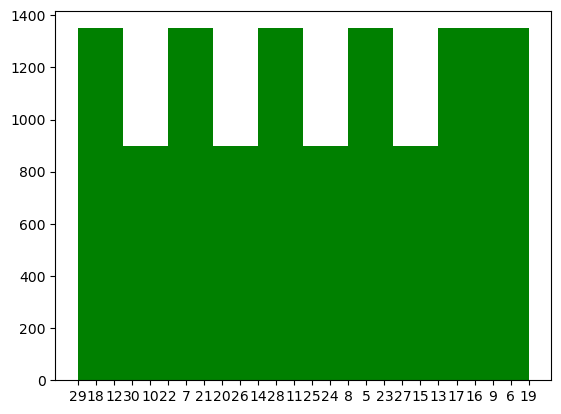

In [5]:
shuffle(onlyfiles)
age = [i.split('_')[0] for i in onlyfiles]
print (age)

nbins = 10
plt.hist(age,nbins,color='green',histtype='bar')
plt.show()

In [6]:
print(len(age))

11700


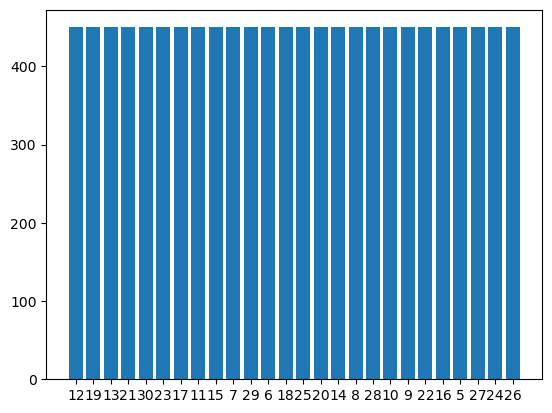

Max value: 9


In [7]:
import matplotlib.pyplot as plt
x_age = list(set(age))
y_age = [age.count(i) for i in x_age]
plt.bar(x_age,y_age)
plt.show()
print("Max value:",max(age))

In [8]:
classes = []
for i in age:
  if(i!="model.png" and "model"):
      i = int(i)

      if (i>=5) and (i<=12):
          classes.append(0)
      if (i>=13) and (i<=17):
          classes.append(1)
      if (i>=18) and (i<=30):
          classes.append(2)

In [9]:
print(len(classes))

11700


In [10]:


classes[:3]

print(len(classes))

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels.shape

11700


(11700, 3)

CONVERT IMAGES TO VECTORS

In [11]:
X_data =[]
for file in onlyfiles:
  if(file !="model.png"):
      face=imageio.imread(file,pilmode="RGB")
      face =cv2.resize(face, (224, 224))
      X_data.append(face)


C:\Users\CyberOps\AppData\Local\Temp\ipykernel_304\461346239.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  face=imageio.imread(file,pilmode="RGB")


In [13]:
X = np.squeeze(X_data)
X.shape


(11700, 224, 224, 3)

In [14]:

# normalize data
X = X.astype('float32')
X /= 255

classes[:3]

categorical_labels = to_categorical(classes, num_classes=3)
categorical_labels[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [38]:
print(X.shape)


(11700, 224, 224, 3)


In [15]:
#Visualize data by pandas

age_labels = pd.Series(list(categorical_labels), name = 'Ages')


label = pd.concat([age_labels], axis = 1)
label.shape

(11700, 1)

In [16]:
categorical_labels.shape

(11700, 3)

In [18]:
IMAGE_SIZE = (225,225,3)

In [19]:
IMG_SHAPE = (224,224,3)
mobileNet_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 35s 4us/step


In [21]:
mobileNet_model .trainable = False

In [24]:
mobileNet_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_mobilenet_model= models.Sequential([
    mobileNet_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [26]:
custom_mobilenet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Model Creation

In [19]:
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train_class, y_test_class  = train_test_split(X, categorical_labels, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test,y_val_class, y_test_class= train_test_split(x_test,  y_test_class,test_size=test_ratio/(test_ratio + validation_ratio))

print("Training Image Size", x_train.shape," Validation Image Size", x_val.shape, "Testing Image Size ",x_test.shape)
print("Training Label Size",y_train_class.shape, "validation Label Size",y_val_class.shape, "Testing Image Size",y_test_class.shape)


Training Image Size (8189, 224, 224, 3)  Validation Image Size (2340, 224, 224, 3) Testing Image Size  (1171, 224, 224, 3)
Training Label Size (8189, 3) validation Label Size (2340, 3) Testing Image Size (1171, 3)


In [24]:

custom_mobilenet_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

n_folds=3


#save the model history in a list after fitting so that we can plot later
model_history = []

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_history=custom_mobilenet_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")



Epoch 1/70
128/128 [==============================] - 173s 1s/step - loss: 0.8082 - accuracy: 0.6978 - val_loss: 0.5394 - val_accuracy: 0.7850
Epoch 2/70
128/128 [==============================] - 179s 1s/step - loss: 0.3527 - accuracy: 0.8736 - val_loss: 0.4772 - val_accuracy: 0.8261
Epoch 3/70
128/128 [==============================] - 189s 1s/step - loss: 0.1745 - accuracy: 0.9358 - val_loss: 0.3811 - val_accuracy: 0.8962
Epoch 4/70
128/128 [==============================] - 190s 1s/step - loss: 0.0819 - accuracy: 0.9729 - val_loss: 0.5063 - val_accuracy: 0.8714
Epoch 5/70
128/128 [==============================] - 191s 1s/step - loss: 0.0731 - accuracy: 0.9757 - val_loss: 0.3972 - val_accuracy: 0.9124
Epoch 6/70
128/128 [==============================] - 233s 2s/step - loss: 0.0317 - accuracy: 0.9908 - val_loss: 0.4190 - val_accuracy: 0.9064
Epoch 7/70
128/128 [==============================] - 219s 2s/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.5549 - val_accuracy: 0.8974

In [25]:
custom_mobilenet_model.evaluate(x_test,y_test_class)

37/37 [==============================] - 20s 531ms/step - loss: 0.4404 - accuracy: 0.9001


[0.4404143691062927, 0.9000853896141052]

In [ ]:
#model.compile(loss = 'mean_squared_error', optimizer="adam", metrics = ['accuracy'])

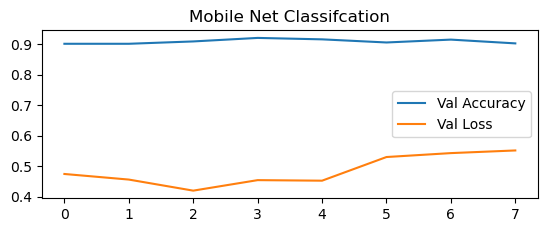

In [26]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Mobile Net Classifcation')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.plot(model_history.history['val_loss'], label='Val Loss')
plt.legend()

Define some callbacks

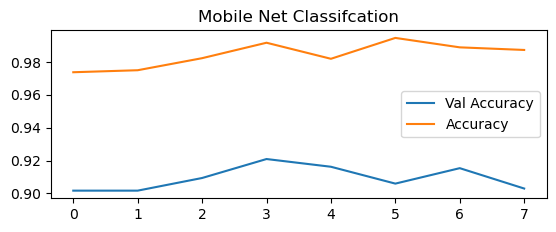

In [27]:
import matplotlib.pyplot as plt

# plot loss during training
plt.subplot(211)
plt.title('Mobile Net Classifcation')
plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
plt.plot(model_history.history['accuracy'], label='Accuracy')
plt.legend()

In [28]:
yhat = custom_mobilenet_model.predict(x_test)

37/37 [==============================] - 21s 537ms/step


In [29]:
from sklearn.metrics import classification_report


predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       386
           1       0.78      0.80      0.79       225
           2       0.91      0.94      0.93       560

    accuracy                           0.90      1171
   macro avg       0.88      0.88      0.88      1171
weighted avg       0.90      0.90      0.90      1171



[[348  23  15]
 [ 12 179  34]
 [  5  28 527]]
(1171, 3)


<AxesSubplot:>

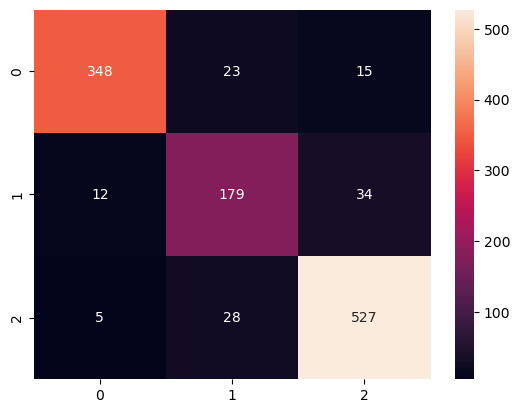

In [30]:
y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)

In [13]:
labels =[
    "(5-12)",# index 0
    "(13-17)" ,# index 1
        "(18-30)"# index 2
        ]

37/37 [==============================] - 21s 565ms/step


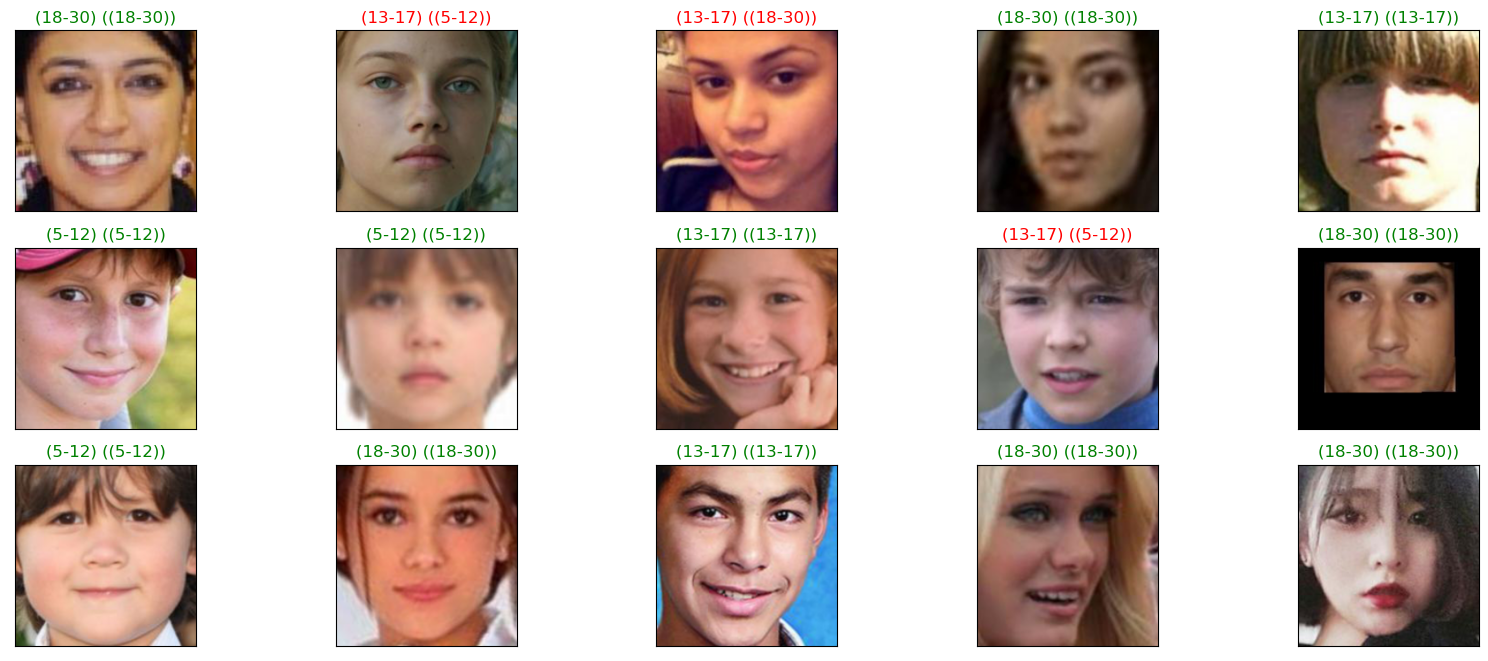

In [32]:
#CLASSIFICATION MODEL OUTPUT (98%)


y_hat = custom_mobilenet_model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

without Cross Validation

In [16]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
## Loading VGG16 model
vgg16_model = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg16_model.trainable = False ## Not trainable weights

checking the model performance

In [17]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_vgg16_model= models.Sequential([
    vgg16_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [18]:
custom_vgg16_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

n_folds=3


#save the model history in a list after fitting so that we can plot later
model_historyA = []

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_historyA=custom_vgg16_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")


Epoch 1/70
128/128 [==============================] - 3140s 25s/step - loss: 0.7149 - accuracy: 0.6948 - val_loss: 0.6473 - val_accuracy: 0.7167
Epoch 2/70
128/128 [==============================] - 2572s 20s/step - loss: 0.4729 - accuracy: 0.8134 - val_loss: 0.4460 - val_accuracy: 0.8252
Epoch 3/70
128/128 [==============================] - 2433s 19s/step - loss: 0.3243 - accuracy: 0.8795 - val_loss: 0.5882 - val_accuracy: 0.7769
Epoch 4/70
128/128 [==============================] - 2420s 19s/step - loss: 0.2309 - accuracy: 0.9198 - val_loss: 0.3497 - val_accuracy: 0.8731
Epoch 5/70
128/128 [==============================] - 2420s 19s/step - loss: 0.1625 - accuracy: 0.9443 - val_loss: 0.3230 - val_accuracy: 0.8962
Epoch 6/70
128/128 [==============================] - 2351s 18s/step - loss: 0.1421 - accuracy: 0.9492 - val_loss: 0.3774 - val_accuracy: 0.8889
Epoch 7/70
128/128 [==============================] - 2341s 18s/step - loss: 0.1145 - accuracy: 0.9604 - val_loss: 0.3887 - val_ac

from sklearn.metrics import classification_report
yhat = custom_vgg16_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

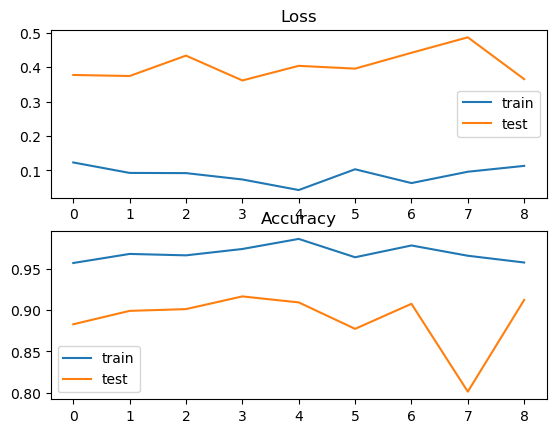

In [20]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_historyA.history['loss'], label='train')
plt.plot(model_historyA.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_historyA.history['accuracy'], label='train')
plt.plot(model_historyA.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Cross Validation Accuracy

[[369  23   6]
 [ 21 184  16]
 [ 10  34 508]]
(1171, 3)


<AxesSubplot:>

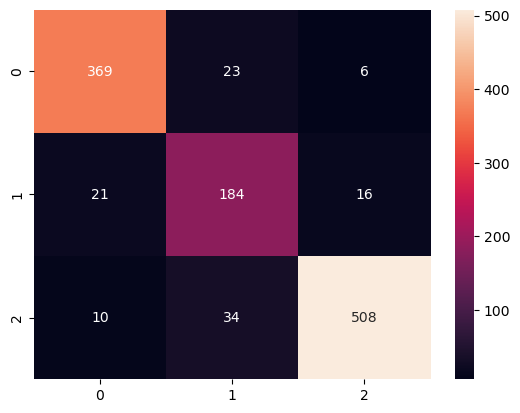

In [21]:
y_pred=np.argmax(yhat, axis=1)
y_test=np.argmax(y_test_class, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(yhat.shape)

import seaborn as sns
sns.heatmap(cm, fmt="d", annot=True)

37/37 [==============================] - 254s 7s/step


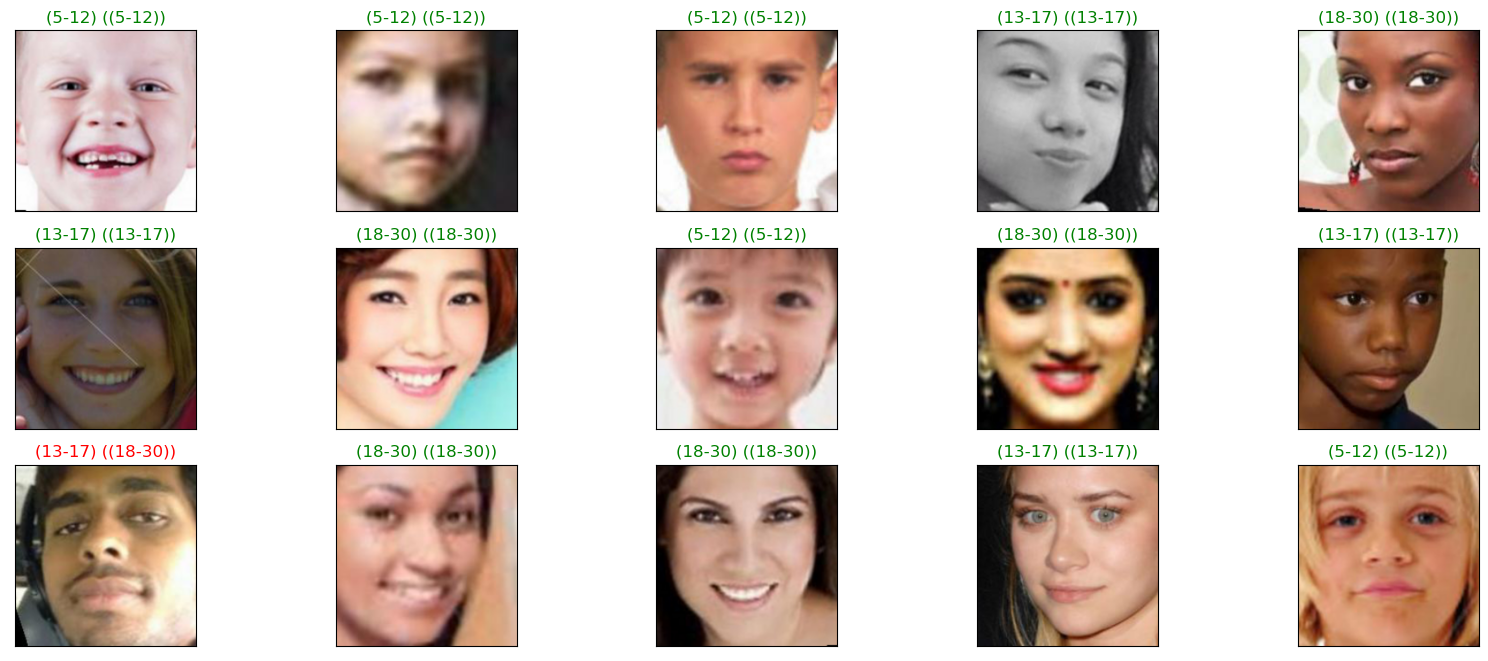

In [22]:
#CLASSIFICATION MODEL OUTPUT (98%)


y_hat = custom_vgg16_model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_class[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index],
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()

Grouping the labels to desired class{ child, teenager, and adult}

In [17]:
from keras.applications.vgg19 import VGG19

In [20]:

## Loading VGG19 model
vgg19_model = VGG19(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg19_model.trainable = False ## Not trainable weights

In [21]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_vgg19_model= models.Sequential([
    vgg19_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [17]:
custom_vgg19_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 3)                 3

In [22]:
custom_vgg19_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

n_folds=3


#save the model history in a list after fitting so that we can plot later
model_historyB = []

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_historyB=custom_vgg19_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/70
128/128 [==============================] - 2548s 20s/step - loss: 0.8246 - accuracy: 0.6540 - val_loss: 0.6300 - val_accuracy: 0.7560
Epoch 2/70
128/128 [==============================] - 2511s 20s/step - loss: 0.5755 - accuracy: 0.7721 - val_loss: 0.5394 - val_accuracy: 0.7910
Epoch 3/70
128/128 [==============================] - 3078s 24s/step - loss: 0.4553 - accuracy: 0.8234 - val_loss: 0.4709 - val_accuracy: 0.8214
Epoch 4/70
128/128 [==============================] - 3006s 24s/step - loss: 0.3448 - accuracy: 0.8673 - val_loss: 0.4083 - val_accuracy: 0.8509
Epoch 5/70
128/128 [==============================] - 2606s 20s/step - loss: 0.3515 - accuracy: 0.8690 - val_loss: 0.4336 - val_accuracy: 0.8444
Epoch 6/70
128/128 [==============================] - 2596s 20s/step - loss: 0.2401 - accuracy: 0.9133 - val_loss: 0.3746 - val_accuracy: 0.8752
Epoch 7/70
128/128 [==============================] - 2649s 21s/step - loss: 0.1958 - accuracy: 0.9334 - val_loss: 0.4446 - val_ac

Saving the model

In [23]:
from sklearn.metrics import classification_report
yhat = custom_vgg19_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

37/37 [==============================] - 449s 12s/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       330
           1       0.88      0.69      0.78       232
           2       0.90      0.97      0.93       609

    accuracy                           0.90      1171
   macro avg       0.90      0.86      0.88      1171
weighted avg       0.90      0.90      0.90      1171



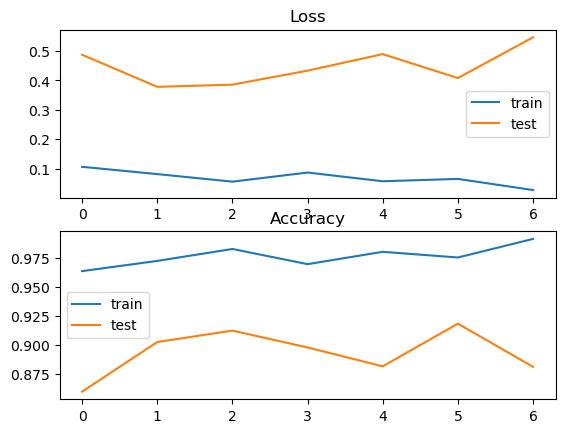

In [24]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_historyB.history['loss'], label='train')
plt.plot(model_historyB.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_historyB.history['accuracy'], label='train')
plt.plot(model_historyB.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Implementing our model

In [25]:
resnet50model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False,  input_shape=x_train[0].shape)
for layer in resnet50model.layers:
    layer.trainable = False


In [26]:
from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(64, activation='relu')

dense_layer_2 = layers.Dense(64, activation='relu')

dense_layer_3 = layers.Dense(128, activation='relu')

dense_layer_4 = layers.Dense(128, activation='relu')

class_layer = layers.Dense(3, activation='softmax')


custom_ResNet50_model= models.Sequential([
    resnet50model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    dense_layer_4,
    class_layer
])

In [27]:
custom_ResNet50_model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

n_folds=3


#save the model history in a list after fitting so that we can plot later
model_historyC = []

for i in range(n_folds):
  early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=5, restore_best_weights=True)
  model_historyC=custom_ResNet50_model.fit(x_train,y_train_class, batch_size=64,epochs=70,validation_data=(x_val, y_val_class),callbacks=[early_stopping])
  print("Training on Fold: ",i+1)
  print("======="*12, end="\n\n\n")
  print("======="*12, end="\n\n\n")

Epoch 1/70
128/128 [==============================] - 714s 6s/step - loss: 1.0911 - accuracy: 0.4695 - val_loss: 1.0416 - val_accuracy: 0.5406
Epoch 2/70
128/128 [==============================] - 701s 5s/step - loss: 0.9959 - accuracy: 0.5340 - val_loss: 1.1233 - val_accuracy: 0.3880
Epoch 3/70
128/128 [==============================] - 718s 6s/step - loss: 0.9389 - accuracy: 0.5739 - val_loss: 0.8409 - val_accuracy: 0.6543
Epoch 4/70
128/128 [==============================] - 709s 6s/step - loss: 0.8557 - accuracy: 0.6323 - val_loss: 0.8977 - val_accuracy: 0.6068
Epoch 5/70
128/128 [==============================] - 714s 6s/step - loss: 0.8352 - accuracy: 0.6482 - val_loss: 0.8111 - val_accuracy: 0.6607
Epoch 6/70
128/128 [==============================] - 716s 6s/step - loss: 0.8247 - accuracy: 0.6584 - val_loss: 0.7844 - val_accuracy: 0.6765
Epoch 7/70
128/128 [==============================] - 705s 6s/step - loss: 0.8047 - accuracy: 0.6661 - val_loss: 0.7757 - val_accuracy: 0.6692

In [28]:
from sklearn.metrics import classification_report
yhat = custom_ResNet50_model.predict(x_test)

predicted_classes = np.argmax(yhat, axis=1)
true_classes = np.argmax(y_test_class, axis=1)
report = classification_report(true_classes, predicted_classes)
print (report)

37/37 [==============================] - 83s 2s/step
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       330
           1       0.00      0.00      0.00       232
           2       0.76      0.94      0.84       609

    accuracy                           0.73      1171
   macro avg       0.48      0.59      0.53      1171
weighted avg       0.58      0.73      0.65      1171



C:\Users\CyberOps\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CyberOps\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\CyberOps\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

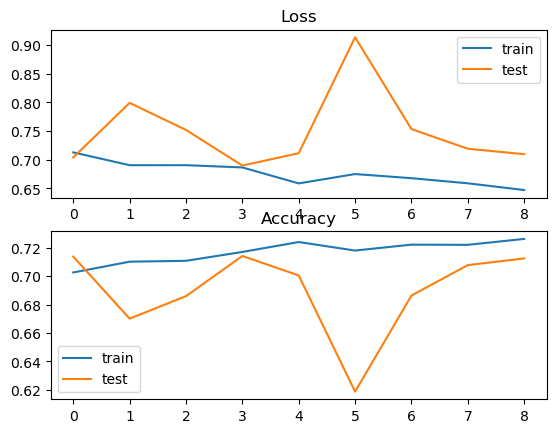

In [29]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(model_historyC.history['loss'], label='train')
plt.plot(model_historyC.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(model_historyC.history['accuracy'], label='train')
plt.plot(model_historyC.history['val_accuracy'], label='test')
plt.legend()
plt.show()